<a href="https://colab.research.google.com/github/jaquedebrito/Atividades_TrilhaParaElas_FaseMentoria/blob/main/Copy_of_Atividades_TrilhaParaElas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Atividades sobre Análise Exploratória de Dados - Trilha de IA para Elas*

In [28]:
!pip install -U datasets

In [29]:
#Importa biblioteca para carregar datasets do Hugging face
from datasets import load_dataset
#Importa biblioteca para geração de gráficos
import matplotlib.pyplot as plt
#Importa pandas
import pandas as pd
import numpy as np
from datetime import datetime

In [30]:
#Carrega dataset do Hugging face
ds = load_dataset("ruanchaves/b2w-reviews01")

In [31]:
#Visualiza estrutura do Dataset
ds

DatasetDict({
    train: Dataset({
        features: ['submission_date', 'reviewer_id', 'product_id', 'product_name', 'product_brand', 'site_category_lv1', 'site_category_lv2', 'review_title', 'overall_rating', 'recommend_to_a_friend', 'review_text', 'reviewer_birth_year', 'reviewer_gender', 'reviewer_state'],
        num_rows: 132373
    })
})

In [32]:
# Converter para DataFrame
df = pd.DataFrame(ds['train'])
#Dimensões do dataset (quantidade de registros e variáveis)
df.shape

(132373, 14)

1. Gere um gráfico que mostre a distribuição do número de avaliações por gênero? Dica: Gere um gráfico de barras que represente o número de avaliações por gênero.

2. Gere um gráfico que mostre a proporção do número de avaliações por gênero? Dica: Gere um gráfico de pizza que represente a proporção de avaliações para cada gênero.

In [33]:
tab_aval = df['reviewer_gender'].value_counts().sort_index()
tab_aval

,count
reviewer_gender,
F,62071
M,66166


Text(0, 0.5, 'Quantidade de Avaliações')

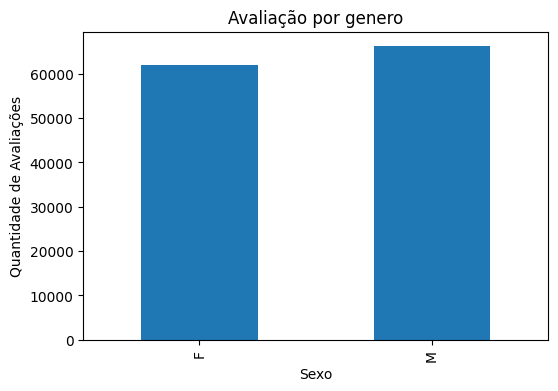

In [34]:
#Configurar tamanho do gráfico
plt.figure(figsize=(6, 4))
df['reviewer_gender'].value_counts().sort_index().plot(kind='bar')
plt.title('Avaliação por genero')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Avaliações')

Text(0, 0.5, '')

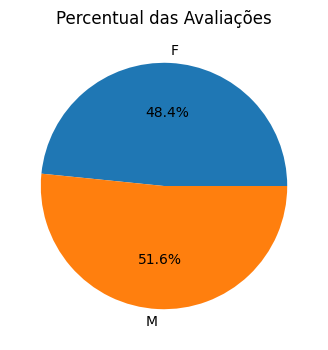

In [35]:
#Gera gráfico de pizza. Autopct: é uma string ou função usada para rotular as partes do gráfico com seus valores numéricos
plt.figure(figsize=(6, 4))
df['reviewer_gender'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentual das Avaliações')
plt.ylabel('')

3. Gere um gráfico de barras das 10 categorias de produtos mais avaliadas. Dica: Considere o campo "site_category_lv1" como categoria do produto.

Text(0, 0.5, 'Quantidade de Avaliações')

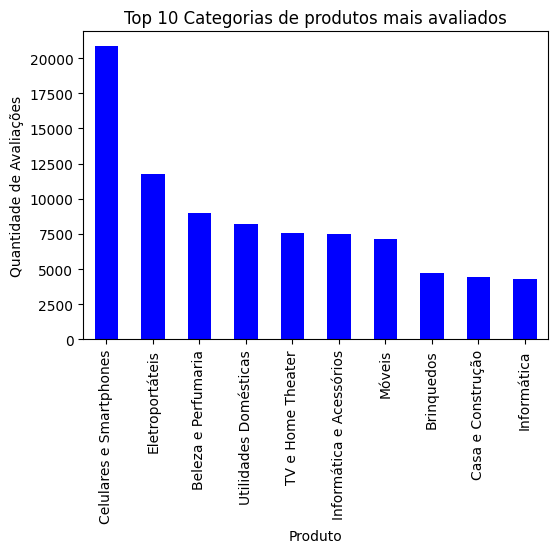

In [36]:
plt.figure(figsize=(6, 4))
df['site_category_lv1'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Categorias de produtos mais avaliados')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Avaliações')

4. Quais são os 5 produtos mais e menos avaliados? Dica: Utilize as funções head() e tail() para obter os top primeiros e os top ultimos produtos.

Text(0, 0.5, 'Quantidade de Avaliações')

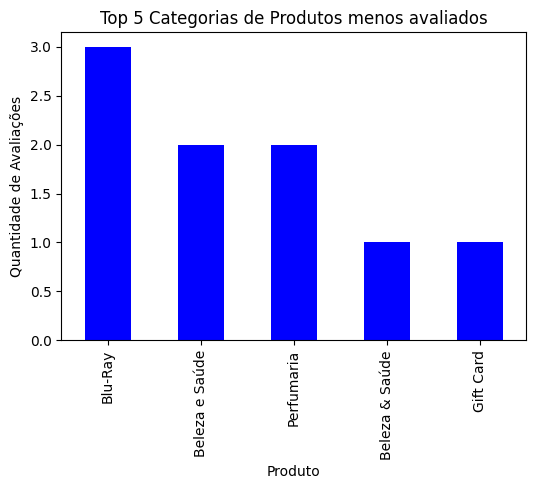

In [37]:
plt.figure(figsize=(6, 4))
df['site_category_lv1'].value_counts().tail(5).plot(kind='bar', color='blue')
plt.title('Top 5 Categorias de Produtos menos avaliados')
plt.xlabel('Produto')
plt.ylabel('Quantidade de Avaliações')

5. Gere um gráfico de pizza que mostre a proporção de avaliação (1-5) das top 10 categorias de produtos mais vendidas?



Text(0, 0.5, '')

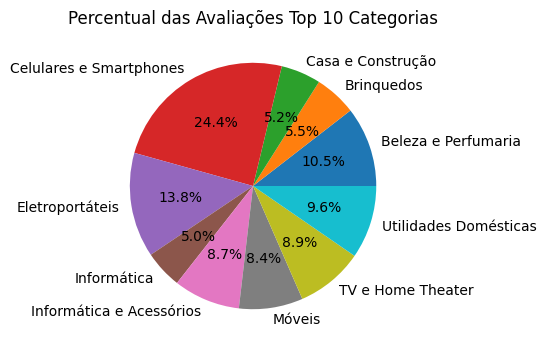

In [38]:
#Gera gráfico de pizza. Autopct: é uma string ou função usada para rotular as partes do gráfico com seus valores numéricos
plt.figure(figsize=(6, 4))
df['site_category_lv1'].value_counts().head(10).sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentual das Avaliações Top 10 Categorias')
plt.ylabel('')

6. Gere um gráfico de pizza que mostre a proporção de avaliação (1-5) dos avaliadores entre 31-40 anos?

In [39]:
#Converter as informações do submission_date que está string para datetime e gravar no campo "submission_data_1"
df['submission_date_1'] = pd.to_datetime(df['submission_date'],errors='coerce')
# Extrair o ano da submissão do novo campo e salvar no campo submission_year
df['submission_year'] = df['submission_date_1'].dt.year

In [40]:
# Converter reviewer_birth_year para numérico (para evitar erros)
df['reviewer_birth_year'] = pd.to_numeric(df['reviewer_birth_year'], errors='coerce')

In [41]:
#Cria campo idade e calcula a idade de cada revisor
df['idade'] = df['submission_year'] - df['reviewer_birth_year']

In [42]:
df_filtered_age = df[(df['idade'] >= 31) & (df['idade'] <= 40)]
display(df_filtered_age.head())

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state,submission_date_1,submission_year,idade
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP,2018-01-01 00:26:02,2018,34.0
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP,2018-01-01 00:35:54,2018,33.0
5,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,22562178,Copo Acrílico Com Canudo 500ml Rocie,None,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,5,Yes,"Excelente produto, por fora em material acríli...",1979.0,M,PA,2018-01-01 01:27:23,2018,39.0
7,2018-01-01 01:58:17,e039cbff059effe12756772b358af4323c2157e9561da8...,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,None,Celulares e Smartphones,Smartphone,Gostei bastante do produto,4,Yes,Produto excelente qualidade boa câmera desenvo...,1987.0,M,GO,2018-01-01 01:58:17,2018,31.0
8,2018-01-01 02:02:13,a0fd1ad35b08d3b764ad6f884ef7183bf29fc7ebfcae65...,122776350,Ventilador de Teto Ventisol Fenix Premium Bran...,ventisol,Casa e Construção,Climatização,Gostei do produto,5,Yes,O barulho e minimo e o vento é bem forte na ve...,1987.0,M,SP,2018-01-01 02:02:13,2018,31.0


In [43]:
# Conta os ratings na faixa etária
rating_counts = df_filtered_age['overall_rating'].value_counts().sort_index()
rating_counts

,count
overall_rating,
1,9148
2,2698
3,5040
4,9758
5,14339


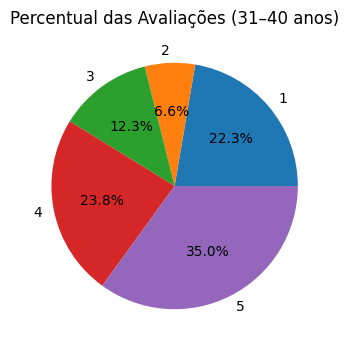

In [44]:
#Gera gráfico de pizza. Autopct: é uma string ou função usada para rotular as partes do gráfico com seus valores numéricos
plt.figure(figsize=(6, 4))
rating_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentual das Avaliações (31–40 anos)')
plt.ylabel('')
plt.show()

:7. Gere uma *wordcloud* das palavras mais frequentes encontradas nos textos das avaliações positivas (considere avaliações positivoas as notas 4 e 5)?

In [45]:
#Importa biblioteca
from wordcloud import WordCloud

In [46]:
df_filtered_positive = df[(df['overall_rating'] >= 4)]
texts = df_filtered_positive['review_text']
texts

,review_text
0,Estou contente com a compra entrega rápida o ú...
1,"Por apenas R$1994.20,eu consegui comprar esse ..."
2,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4,"A entrega foi no prazo, as americanas estão de..."
...,...
132366,"A Smart TV 43"" tem ótima definição de imagem. ..."
132367,"Perfeito e pratico, a imagem ficou muito melho..."
132368,"Vale muito, estou usando no controle do Xbox e..."
132369,"Prático e barato, super indico o produto para ..."


In [47]:
#Concatena todos os campos textos em uma string, considerando campos Nulos
full_text = " ".join([str(text) if text is not None else "" for text in texts])

In [48]:
# Cria a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)

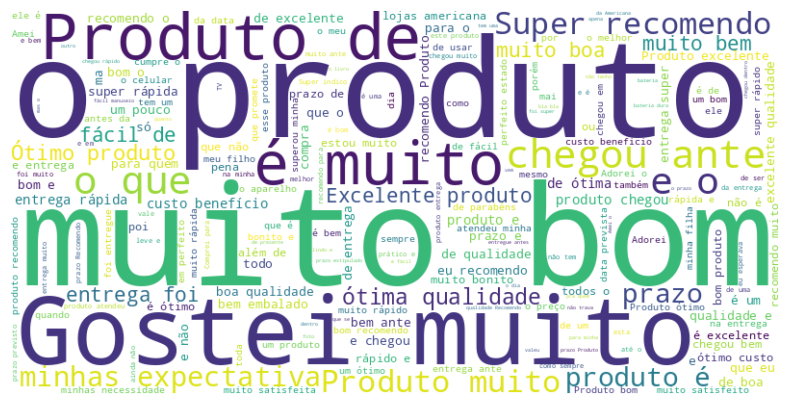

In [49]:
# Gera a imagem
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

8. Gere uma nuvem de palavras para cada faixa etária de idade (['<20', '21–30', '31–40', '41–50', '51–60', '60+']) considerando o título das avaliações (campo '`review_title`').

In [50]:
bins = [0, 20, 30, 40, 50, 60, 200]
labels = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']
df['faixa_etaria'] = pd.cut(df['idade'], bins=bins, labels=labels, right=True)

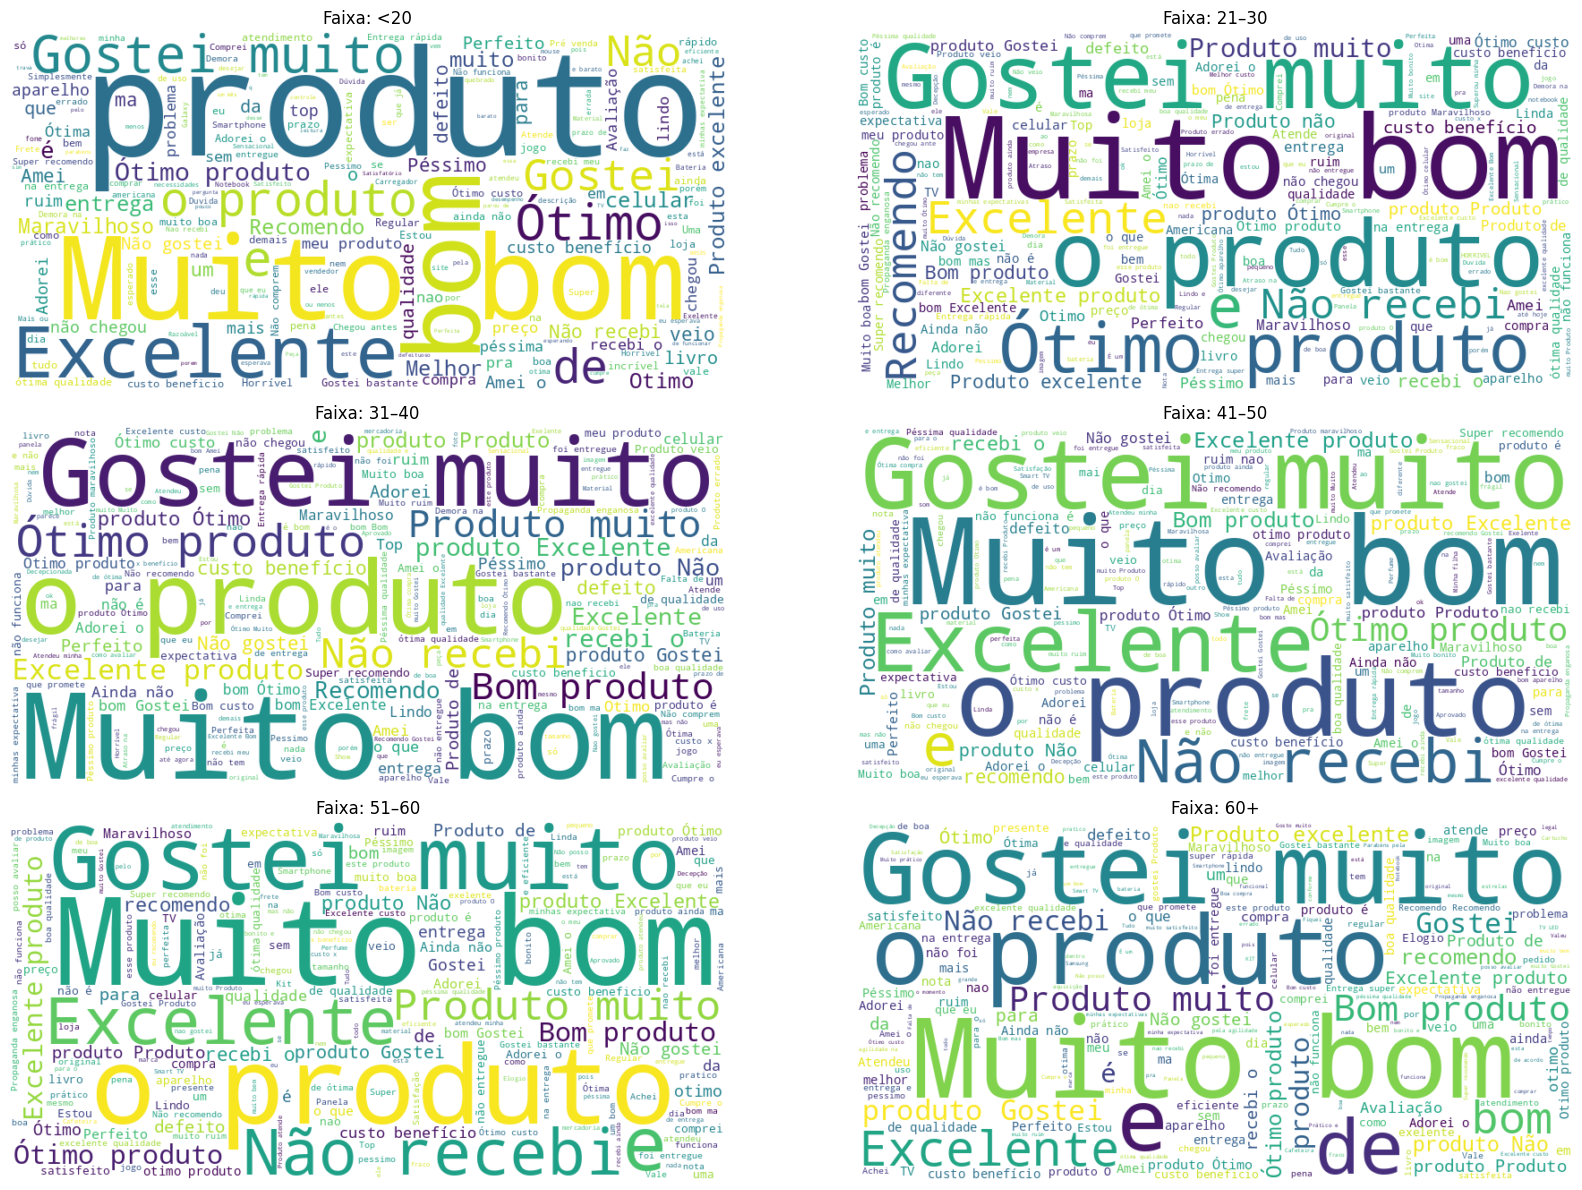

In [51]:
# Lista de faixas na ordem desejada
faixas = ['<20', '21–30', '31–40', '41–50', '51–60', '60+']
plt.figure(figsize=(18, 12))

for idx, faixa in enumerate(faixas):
    textos_faixa = df[df['faixa_etaria'] == faixa]['review_title']
    full_text = " ".join([str(t) if t is not None else "" for t in textos_faixa])
    # Gera a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(full_text)
    plt.subplot(3, 2, idx + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Faixa: {faixa}')

plt.tight_layout()
plt.show()

9. ***Desafio***: Gere um gráfico de barras com a distribuição de avaliações por faixa etária da idade. Considerar o seguinte range de faixas: '<20', '21–30', '31–40', '41–50', '51–60', '60+'

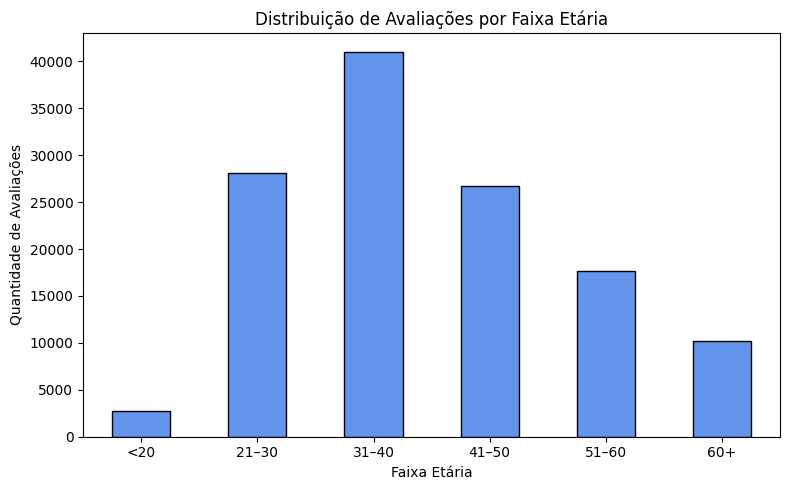

In [52]:
# Conta a quantidade de avaliações em cada faixa etária
faixa_counts = df['faixa_etaria'].value_counts().reindex(faixas)  # Usa sua ordem personalizada

# Plota o gráfico de barras
plt.figure(figsize=(8, 5))
faixa_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Distribuição de Avaliações por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Avaliações')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

10. ***Desafio***: Criar uma tabela cruzada para demonstrar a correlação entre Avaliações e Recomendação ('overall_rating') para uma amigo ('recommend_to_a_friend'). Dica: utilizar a função crosstab do pandas (https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

In [53]:
# Tabela cruzada entre notas e recomendação
tabela_cruzada = pd.crosstab(df['overall_rating'], df['recommend_to_a_friend'], margins=True, margins_name='Total')

# Exibe a tabela cruzada
print(tabela_cruzada)

recommend_to_a_friend     No    Yes   Total
overall_rating                             
1                      26574    795   27369
2                       6321   2068    8389
3                       1879  14434   16313
4                        508  31837   32345
5                        705  47234   47939
Total                  35987  96368  132355
